In [1]:
import pandas as pd
import numpy as np
import re

from pandas.api.types import is_numeric_dtype

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path



In [2]:
df = pd.read_csv('df_cleaned_part_1.csv')

In [3]:
df.describe(include='all')

,book_name,book_series,book_series_number,authorName,description,pages,rating,rating_Count,reviews_Count,ISBN13,...,Rating4,Rating3,Rating2,Rating1,Rating5_Percent,Rating4_Percent,Rating3_Percent,Rating2_Percent,Rating1_Percent,people_liked
count,3960,3960,3.960000e+03,3960,3959,3960.000000,3960.000000,3.960000e+03,3960.000000,3.960000e+03,...,3.960000e+03,3.960000e+03,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000
unique,3960,1954,NaN,1176,3959,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Borne,Discworld,NaN,Terry Pratchett,A comet the color of blood and flame cuts acro...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,52,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.250416e+06,NaN,NaN,381.990152,4.059402,9.074697e+04,4640.725758,9.780727e+12,...,2.898106e+04,1.511822e+04,4125.113889,1915.908838,39.480051,33.825505,18.629293,4.292172,1.263636,93.432576
std,NaN,NaN,6.630763e+07,NaN,NaN,239.056962,0.242616,3.206999e+05,10288.284886,7.721014e+08,...,9.085469e+04,4.628129e+04,15945.850345,11823.655687,11.016377,4.815736,6.227436,2.799025,1.433793,4.014120
min,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,2.810000,1.260000e+03,36.000000,9.780006e+12,...,2.630000e+02,5.300000e+01,8.000000,5.000000,7.000000,11.000000,2.000000,0.000000,0.000000,60.000000
25%,NaN,NaN,1.000000e+00,NaN,NaN,272.000000,3.900000,1.649600e+04,837.000000,9.780374e+12,...,5.732750e+03,3.204250e+03,670.000000,191.000000,32.000000,31.000000,14.000000,2.000000,0.000000,91.000000
50%,NaN,NaN,2.000000e+00,NaN,NaN,356.000000,4.070000,2.825850e+04,1829.500000,9.780525e+12,...,9.621500e+03,5.265500e+03,1233.500000,431.000000,39.000000,34.000000,18.000000,4.000000,1.000000,94.000000
75%,NaN,NaN,4.000000e+00,NaN,NaN,447.000000,4.230000,6.059450e+04,3947.000000,9.780813e+12,...,2.081350e+04,1.107775e+04,2855.500000,1078.250000,47.000000,37.000000,23.000000,6.000000,2.000000,96.000000


## has we can see the max numbers in
## 'book_series_number' , 'pages' and 'rating_Count' 
## are abnormally high and we need to take care of them

In [4]:

print(df.published_month.describe(include='all'))
print(df["published_year"].describe(include='all'))
#couldn't see them 

count    3960.000000
mean        6.509343
std         3.211877
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: published_month, dtype: float64
count    3960.000000
mean     2007.851263
std         7.851446
min      1907.000000
25%      2004.750000
50%      2009.000000
75%      2013.000000
max      2022.000000
Name: published_year, dtype: float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_name           3960 non-null   object 
 1   book_series         3960 non-null   object 
 2   book_series_number  3960 non-null   float64
 3   authorName          3960 non-null   object 
 4   description         3959 non-null   object 
 5   pages               3960 non-null   float64
 6   rating              3960 non-null   float64
 7   rating_Count        3960 non-null   float64
 8   reviews_Count       3960 non-null   float64
 9   ISBN13              3960 non-null   float64
 10  published_year      3960 non-null   float64
 11  published_month     3960 non-null   float64
 12  Rating5             3960 non-null   float64
 13  Rating4             3960 non-null   float64
 14  Rating3             3960 non-null   float64
 15  Rating2             3960 non-null   float64
 16  Rating

### there is a series with more then 12 books
# but most of this are mistakes from the crawling 
# because of series that were put in as a book or
# another number in the name of the book series

In [6]:

(df["book_series_number"]>12).sum()

283

## there is a book with 900+ pages
## but most of this are again series of books that was put on the website as books

In [7]:

print((df["pages"]>1000).sum())

63


### there is a book in the website with 0-10 pages..
## of course 0 pages as of itself is a problem so

## i decided to remove all under 10 pages


In [8]:
print((df["pages"]<10).sum())

9


In [9]:
#
((df["pages"]>800)&(df["book_series_number"]>10)).sum()

48

Text(0, 0.5, 'books')

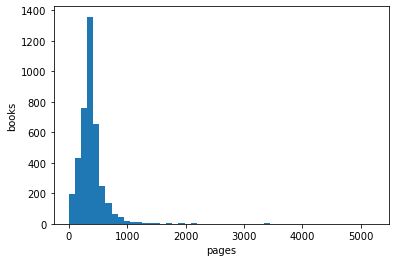

In [10]:
plt.hist(df.pages,bins=50)
plt.xlabel("pages")
plt.ylabel("books")

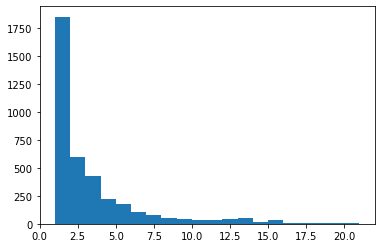

In [11]:
array=df["book_series_number"]

plt.hist(array, bins=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.show()

In [12]:
df2=df.copy()

In [13]:
df2.book_series_number[df2.book_series_number>12]=np.nan
(df2["book_series_number"]>12).sum()

<ipython-input-13-2e8d0501f2ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.book_series_number[df2.book_series_number>12]=np.nan


0

In [14]:
df2=df2.dropna(subset=['book_series_number'])
df2

,book_name,book_series,book_series_number,authorName,description,pages,rating,rating_Count,reviews_Count,ISBN13,...,Rating4,Rating3,Rating2,Rating1,Rating5_Percent,Rating4_Percent,Rating3_Percent,Rating2_Percent,Rating1_Percent,people_liked
0,The Name of the Wind,The Kingkiller Chronicle,1.0,Patrick Rothfuss,"Told in Kvothe's own voice, this is the tale o...",662.0,4.52,835610.0,47936.0,9.780756e+12,...,177000.0,56900.0,18824.0,13450.0,68.0,21.0,6.0,2.0,1.0,96.0
1,The Hobbit,The Lord of the Rings,0.0,J.R.R. Tolkien,In a hole in the ground there lived a hobbit. ...,366.0,4.28,3391633.0,57783.0,9.780525e+12,...,986494.0,414078.0,111797.0,72575.0,53.0,29.0,12.0,3.0,2.0,95.0
2,A Game of Thrones,A Song of Ice and Fire,1.0,George R.R. Martin,Here is the first volume in George R. R. Marti...,835.0,4.44,2241163.0,57841.0,9.780554e+12,...,602760.0,177464.0,47830.0,37461.0,61.0,26.0,7.0,2.0,1.0,96.0
3,Harry Potter and the Prisoner of Azkaban,Harry Potter,3.0,J.K. Rowling,For use in schools and libraries only. During ...,435.0,4.58,3478139.0,68541.0,9.780440e+12,...,808106.0,242841.0,33540.0,17903.0,68.0,23.0,6.0,0.0,0.0,99.0
4,Harry Potter and the Sorcerer's Stone,Harry Potter,1.0,J.K. Rowling,Harry Potter's life is miserable. His parents ...,309.0,4.48,8573990.0,135365.0,9.780525e+12,...,1963142.0,723725.0,167776.0,146241.0,65.0,22.0,8.0,1.0,1.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,The Year of the Witching,Bethel,1.0,Alexis Henderson,"A young woman living in a rigid, puritanical s...",368.0,3.81,24152.0,4281.0,9.780593e+12,...,9797.0,6395.0,1576.0,332.0,25.0,40.0,26.0,6.0,1.0,92.0
3956,The Tower of Nero,The Trials of Apollo,5.0,Rick Riordan,"At last, the breathtaking, action-packed final...",410.0,4.53,39609.0,4507.0,9.780525e+12,...,11124.0,2950.0,373.0,148.0,63.0,28.0,7.0,0.0,0.0,99.0
3957,To Sleep in a Sea of Stars,Fractalverse,1.0,Christopher Paolini,Kira Navárez dreamed of life on new worlds. No...,878.0,3.77,39277.0,6983.0,9.781251e+12,...,14807.0,9271.0,3366.0,1179.0,27.0,37.0,23.0,8.0,3.0,88.0
3958,The Once and Future Witches,The Once and Future Witches,1.0,Alix E. Harrow,"In 1893, there's no such thing as witches. The...",517.0,4.07,51701.0,8019.0,9.780316e+12,...,19209.0,9494.0,2395.0,727.0,38.0,37.0,18.0,4.0,1.0,94.0


In [15]:
print((df2["pages"]>1000).sum())


30


In [16]:
df2.pages[df2.pages>1000]=np.nan
df2.pages[df2.pages<10]=np.nan

df2=df2.dropna(subset=['pages'])

<ipython-input-16-f3147bde11a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.pages[df2.pages<10]=np.nan


In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 0 to 3959
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_name           3640 non-null   object 
 1   book_series         3640 non-null   object 
 2   book_series_number  3640 non-null   float64
 3   authorName          3640 non-null   object 
 4   description         3640 non-null   object 
 5   pages               3640 non-null   float64
 6   rating              3640 non-null   float64
 7   rating_Count        3640 non-null   float64
 8   reviews_Count       3640 non-null   float64
 9   ISBN13              3640 non-null   float64
 10  published_year      3640 non-null   float64
 11  published_month     3640 non-null   float64
 12  Rating5             3640 non-null   float64
 13  Rating4             3640 non-null   float64
 14  Rating3             3640 non-null   float64
 15  Rating2             3640 non-null   float64
 16  Rating

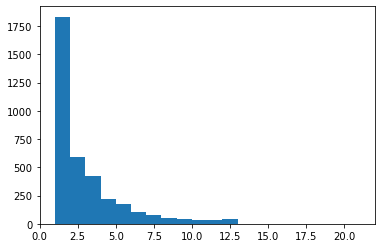

In [18]:
array=df2["book_series_number"]

plt.hist(array, bins=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.show()

In [19]:
(df2["rating_Count"]>700000).sum()

80

## we can see that the histogram is shifted
## to the left becuse there are many outliar books
## the most rating_Count is 8e+06 very high jump from the the 50% 2e04 

Text(0, 0.5, 'books')

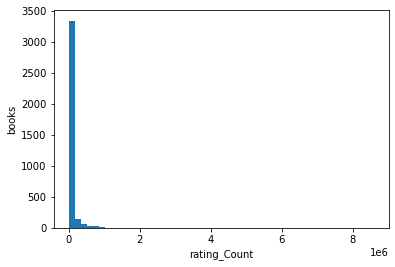

In [20]:

plt.hist(df2.rating_Count,bins=50)
plt.xlabel("rating_Count")
plt.ylabel("books")

In [21]:
(df2.rating_Count>700000).sum()

80

In [22]:
df2.rating_Count[df2.rating_Count>700000]=np.nan


df2=df2.dropna(subset=['rating_Count'])
df2

<ipython-input-22-5302ac708c55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rating_Count[df2.rating_Count>700000]=np.nan
C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,book_name,book_series,book_series_number,authorName,description,pages,rating,rating_Count,reviews_Count,ISBN13,...,Rating4,Rating3,Rating2,Rating1,Rating5_Percent,Rating4_Percent,Rating3_Percent,Rating2_Percent,Rating1_Percent,people_liked
7,The Final Empire,The Mistborn Saga,1.0,Brandon Sanderson,"What if the whole world were a dead, blasted w...",541.0,4.46,514527.0,37250.0,9.780525e+12,...,155940.0,40168.0,8299.0,4288.0,59.0,30.0,7.0,1.0,0.0,98.0
14,The Wise Man's Fear,The Kingkiller Chronicle,2.0,Patrick Rothfuss,“There are three things all wise men fear: the...,994.0,4.55,490560.0,24526.0,9.780756e+12,...,114703.0,32759.0,8426.0,3922.0,67.0,23.0,6.0,1.0,0.0,97.0
17,The Eye of the World,The Wheel of Time,1.0,Robert Jordan,The Wheel of Time turns and Ages come and pass...,800.0,4.18,471607.0,19016.0,9.780813e+12,...,155437.0,66152.0,18596.0,10342.0,46.0,32.0,14.0,3.0,2.0,94.0
22,Good Omens: The Nice and Accurate Prophecies o...,Good Omens: The Nice and Accurate Prophecies o...,1.0,Terry Pratchett,According to The Nice and Accurate Prophecies ...,491.0,4.25,639137.0,32482.0,9.780525e+12,...,198964.0,86883.0,22302.0,10629.0,50.0,31.0,13.0,3.0,1.0,95.0
25,Neverwhere,London Below The World of Neverwhere,1.0,Neil Gaiman,Under the streets of London there's a place mo...,370.0,4.17,478650.0,25752.0,9.780061e+12,...,177062.0,74035.0,16106.0,6167.0,42.0,36.0,15.0,3.0,1.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,The Year of the Witching,Bethel,1.0,Alexis Henderson,"A young woman living in a rigid, puritanical s...",368.0,3.81,24152.0,4281.0,9.780593e+12,...,9797.0,6395.0,1576.0,332.0,25.0,40.0,26.0,6.0,1.0,92.0
3956,The Tower of Nero,The Trials of Apollo,5.0,Rick Riordan,"At last, the breathtaking, action-packed final...",410.0,4.53,39609.0,4507.0,9.780525e+12,...,11124.0,2950.0,373.0,148.0,63.0,28.0,7.0,0.0,0.0,99.0
3957,To Sleep in a Sea of Stars,Fractalverse,1.0,Christopher Paolini,Kira Navárez dreamed of life on new worlds. No...,878.0,3.77,39277.0,6983.0,9.781251e+12,...,14807.0,9271.0,3366.0,1179.0,27.0,37.0,23.0,8.0,3.0,88.0
3958,The Once and Future Witches,The Once and Future Witches,1.0,Alix E. Harrow,"In 1893, there's no such thing as witches. The...",517.0,4.07,51701.0,8019.0,9.780316e+12,...,19209.0,9494.0,2395.0,727.0,38.0,37.0,18.0,4.0,1.0,94.0


Text(0, 0.5, 'books')

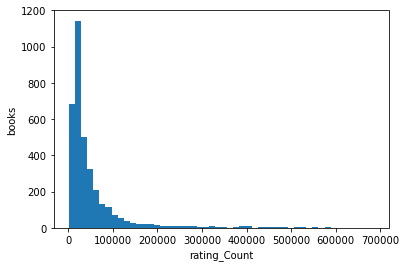

In [23]:
plt.hist(df2.rating_Count,bins=50)
plt.xlabel("rating_Count")
plt.ylabel("books")

In [24]:
(df2["rating_Count"]<10000).sum()

5

In [25]:

df2.rating_Count[df2.rating_Count>200000]=np.nan
df2.rating_Count[df2.rating_Count<10000]=np.nan


df2=df2.dropna(subset=['rating_Count'])
df2


<ipython-input-25-d7767dd8246c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rating_Count[df2.rating_Count<10000]=np.nan


,book_name,book_series,book_series_number,authorName,description,pages,rating,rating_Count,reviews_Count,ISBN13,...,Rating4,Rating3,Rating2,Rating1,Rating5_Percent,Rating4_Percent,Rating3_Percent,Rating2_Percent,Rating1_Percent,people_liked
82,Sabriel,The Old Kingdom,1.0,Garth Nix,Sent to a boarding school in Ancelstierre as a...,491.0,4.16,199430.0,8662.0,9.780064e+12,...,65260.0,30480.0,8218.0,4411.0,45.0,32.0,15.0,4.0,2.0,94.0
100,Moon Called,Mercy Thompson,1.0,Patricia Briggs,"Mercedes Thompson, aka Mercy, is a talented Vo...",289.0,4.14,194100.0,9289.0,9.780441e+12,...,63982.0,30288.0,7778.0,4731.0,44.0,32.0,15.0,4.0,2.0,94.0
123,Royal Assassin,The Farseer Trilogy,2.0,Robin Hobb,Fitz has survived his first hazardous mission ...,675.0,4.24,170847.0,6204.0,9.780525e+12,...,62958.0,22703.0,4761.0,1727.0,46.0,36.0,13.0,2.0,1.0,96.0
125,Fire,Graceling Realm,2.0,Kristin Cashore,It is not a peaceful time in the Dells. The yo...,480.0,4.10,176334.0,11213.0,9.780804e+12,...,60095.0,29921.0,8277.0,3629.0,42.0,34.0,16.0,4.0,2.0,93.0
127,The Neverending Story,The Neverending Story,1.0,Michael Ende,This epic work of the imagination has captured...,396.0,4.17,184925.0,8024.0,9.780525e+12,...,58325.0,30354.0,7354.0,3027.0,46.0,31.0,16.0,3.0,1.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,The Year of the Witching,Bethel,1.0,Alexis Henderson,"A young woman living in a rigid, puritanical s...",368.0,3.81,24152.0,4281.0,9.780593e+12,...,9797.0,6395.0,1576.0,332.0,25.0,40.0,26.0,6.0,1.0,92.0
3956,The Tower of Nero,The Trials of Apollo,5.0,Rick Riordan,"At last, the breathtaking, action-packed final...",410.0,4.53,39609.0,4507.0,9.780525e+12,...,11124.0,2950.0,373.0,148.0,63.0,28.0,7.0,0.0,0.0,99.0
3957,To Sleep in a Sea of Stars,Fractalverse,1.0,Christopher Paolini,Kira Navárez dreamed of life on new worlds. No...,878.0,3.77,39277.0,6983.0,9.781251e+12,...,14807.0,9271.0,3366.0,1179.0,27.0,37.0,23.0,8.0,3.0,88.0
3958,The Once and Future Witches,The Once and Future Witches,1.0,Alix E. Harrow,"In 1893, there's no such thing as witches. The...",517.0,4.07,51701.0,8019.0,9.780316e+12,...,19209.0,9494.0,2395.0,727.0,38.0,37.0,18.0,4.0,1.0,94.0


Text(0, 0.5, 'books')

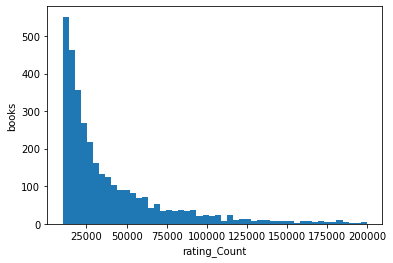

In [26]:
plt.hist(df2.rating_Count,bins=50)
plt.xlabel("rating_Count")
plt.ylabel("books")

In [27]:
df2.to_csv('DATA_After_Cleaning_part_2.csv', index = False)